## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [22]:
!wget https://raw.githubusercontent.com/az09tuan/PLK1/main/combined_compounds-1000active-800%20inactive.csv
df = pd.read_csv('combined_compounds-1000active-800 inactive.csv')

--2024-06-22 15:21:50--  https://raw.githubusercontent.com/az09tuan/PLK1/main/combined_compounds-1000active-800%20inactive.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248845 (243K) [text/plain]
Saving to: ‘combined_compounds-1000active-800 inactive.csv.2’

combined_compounds- 100%[===================>] 243.01K  --.-KB/s    in 0.04s   

2024-06-22 15:21:50 (6.50 MB/s) - ‘combined_compounds-1000active-800 inactive.csv.2’ saved [248845/248845]



In [25]:
smiles_list = df['SMILE'].tolist()
smiles_list

['COc1cc2ncn(-c3cc(OCc4ccccc4C#N)c(C(N)=O)s3)c2cc1OC',
 'CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1CC3=CC(=CC=C3)Br)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OCC)C',
 'C1=CC=C(C(=C1)COC2=C(SC(=C2)N3C=NC4=CC=CC=C43)C(=O)N)Br',
 'COc1cc(C(=O)NC2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(C(C)C)[C@H](C)C(=O)N2C',
 'CCOC(=O)/C(C#N)=c1\\s/c(=C/Nc2ccc(NC(=O)NCCN3CCCC3)cc2)c(=O)n1CC',
 'CC[C@H](C)[C@@H](C(=O)N[C@@H](CC1=CC=C(C=C1)O)C(=O)N)NC(=O)[C@H](C)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CO)NC(=O)[C@H](CC2=CN=CN2)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]3CCCN3C(=O)[C@@H]4CCCN4C(=O)[C@H](CC(=O)O)NC(=O)[C@H](CC5=CC=CC=C5)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCC(=O)O)NC(=O)C',
 'Cn1nc(C(N)=O)c2c1-c1nc(Nc3ccccc3OC(F)(F)F)ncc1CC2',
 'COc1cc(C(=O)NC2CCN(C)CC2)c(Cl)cc1Nc1ncc2c(n1)N(C1CCCC1)CC(F)(F)C(=O)N2C',
 'CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)N(C[C@@H](C(=O)N4C)CC=C)C5CCCC5)OC',
 'C[C@H](C1=CC=CC=C1C(F)(F)F)OC2=C(SC(=C2)N3C=NC4=C3C=C(C=C4)C5=CC=CC=C5)C(=O)N',
 'CN1CCN(CC1)C2=CC(=C(C=C2)OC)NC3=NC=C4CCC5=C(C4=N3)N(N=C5C(=O)N)C',
 'CN1CCC

In [27]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 25.0 MB/s eta 0:00:00


In [28]:
# Calculate fingerprints
fingerprints = []
for smile in smiles_list:
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=800)
    fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
from rdkit import DataStructs
import numpy as np
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X = np.asarray(fingerprint_arrays)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [38]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(1790, 55)

In [39]:
Y=df['pIC50']
Y=Y.values
Y

array([8.22184875, 6.95860731, 7.95860731, ..., 4.60205999, 4.57186521,
       4.74714697])

## **3. Data pre-processing**

In [40]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

## **4. Compare ML algorithms**

In [41]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:13<00:00,  3.18it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 1432, number of used features: 55
[LightGBM] [Info] Start training from score 6.099575
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:11<00:00,  3.72it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 1432, number of used features: 55
[LightGBM] [Info] Start training from score 6.099575


In [42]:
# Performance table of the training set (80% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.83,0.86,0.62,1.05
SVR,0.82,0.85,0.64,0.24
MLPRegressor,0.82,0.84,0.65,2.84
NuSVR,0.81,0.84,0.65,0.35
HistGradientBoostingRegressor,0.81,0.84,0.66,0.66
BaggingRegressor,0.81,0.84,0.66,0.10
LGBMRegressor,0.80,0.83,0.67,0.11
KNeighborsRegressor,0.80,0.83,0.67,0.02
XGBRegressor,0.80,0.83,0.68,0.19


In [ ]:
# Performance table of the test set (20% subset)
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.72,0.79,0.73,0.80
LGBMRegressor,0.70,0.78,0.75,0.09
HistGradientBoostingRegressor,0.70,0.78,0.75,0.61
XGBRegressor,0.70,0.78,0.75,0.16
MLPRegressor,0.69,0.77,0.77,3.12
BaggingRegressor,0.68,0.76,0.78,0.10
KNeighborsRegressor,0.66,0.75,0.80,0.02
SVR,0.64,0.74,0.83,0.16
NuSVR,0.64,0.74,0.83,0.20


## **5. Data visualization of model performance**

[(0.0, 1.0)]

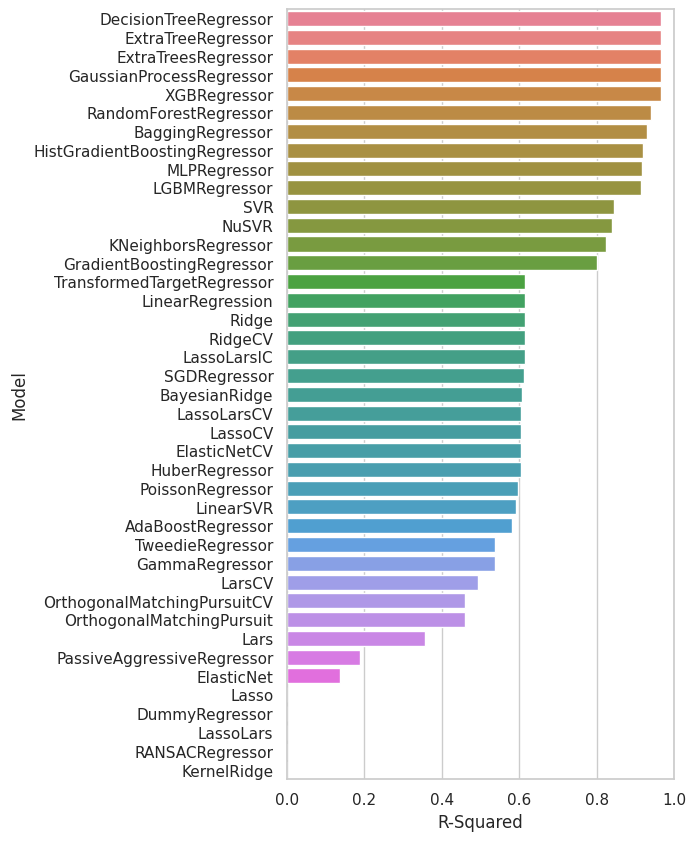

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, hue=predictions_train.index)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

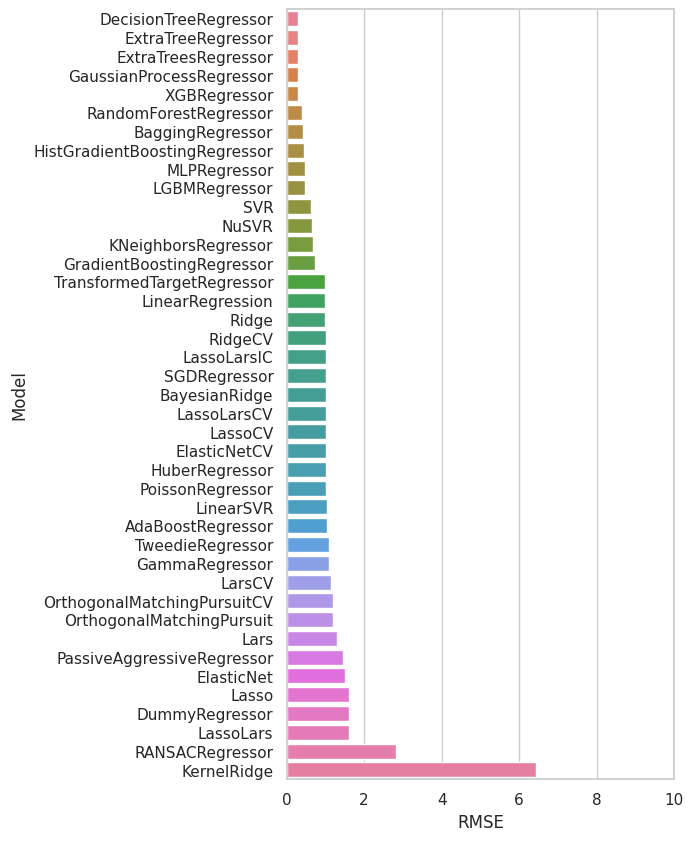

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, hue=predictions_train.index)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

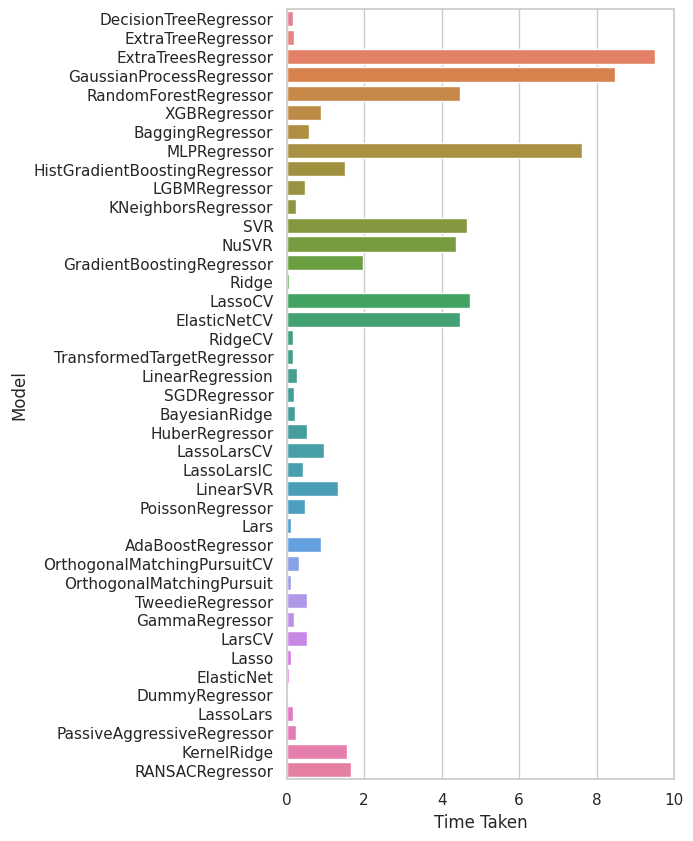

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train, hue=predictions_train.index)
ax.set(xlim=(0, 10))

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [43]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8560005526457661

In [45]:
Y_pred = model.predict(X_test)
Y_pred

array([4.61102006, 6.79964008, 5.88668248, 8.92563772, 6.98469939,
       7.19673273, 6.28812081, 7.41993717, 6.62299092, 8.27980083,
       8.35053432, 5.49465777, 7.32220471, 4.53169746, 7.19388694,
       4.40457588, 8.84057095, 4.62323183, 7.34446321, 8.27980083,
       7.57434632, 4.07519976, 7.36772142, 4.3050094 , 4.71770242,
       8.27980083, 4.6594011 , 4.10719774, 6.34593668, 6.75439097,
       4.47092384, 6.73226134, 4.30793369, 4.52248707, 4.40737896,
       4.45204532, 4.30246877, 6.31398582, 7.56094382, 4.47079077,
       6.32355189, 6.20199792, 7.98669146, 6.96174721, 6.38673699,
       8.43847689, 5.0191473 , 5.46032813, 4.30389203, 8.46181563,
       6.21163196, 6.16893699, 6.372632  , 5.49873378, 4.30103   ,
       4.34023991, 6.19284978, 4.30103   , 7.95787396, 7.41561377,
       4.4413263 , 5.57160838, 7.06429465, 6.82034283, 7.80967865,
       7.19673273, 7.10725585, 3.60161091, 7.67848761, 4.71842453,
       5.10508466, 8.27980083, 7.26624436, 4.55590473, 4.33404

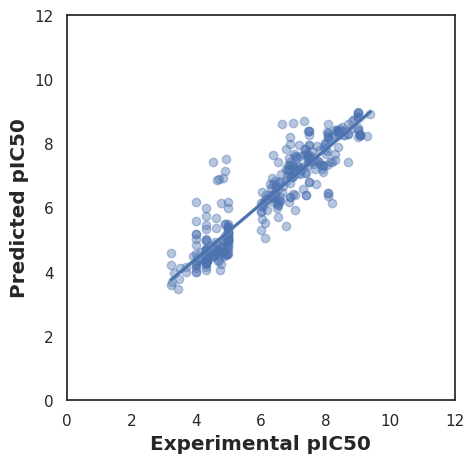

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()